In [59]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
import datetime as dt

In [3]:
df = pd.read_json('covid/db.json')

In [4]:
df.model.drop_duplicates()

0                      mi.county
88                  mi.datetotal
3145                    mi.event
3148    contenttypes.contenttype
3164            sessions.session
3172             auth.permission
3236                   auth.user
3237              admin.logentry
Name: model, dtype: object

In [5]:
counties = df[df.model == 'mi.county']
counties.head()

,model,pk,fields
0,mi.county,1,"{'county': 'Oakland', 'population': 1202362, '..."
1,mi.county,2,"{'county': 'Wayne', 'population': 1107707, 'sq..."
2,mi.county,3,"{'county': 'Ingham', 'population': 280895, 'sq..."
3,mi.county,4,"{'county': 'Kent', 'population': 602622, 'sq_m..."
4,mi.county,5,"{'county': 'Montcalm', 'population': 63342, 's..."


In [6]:
def custom_parse(data):
    j1 = json.loads(data)
    return j1

In [7]:
def blowout(row):
    for k, v in row['fields'].items():
        row[k] = v
    
    return row

In [8]:
counties = counties.apply(blowout, axis=1)

In [9]:
counties = counties[['pk', 'county', 'population', 'sq_mi']]

In [10]:
counties.head()

,pk,county,population,sq_mi
0,1,Oakland,1202362,908
1,2,Wayne,1107707,672
2,3,Ingham,280895,561
3,4,Kent,602622,872
4,5,Montcalm,63342,721


In [11]:
totals = df[df.model == 'mi.datetotal']
totals.head()

,model,pk,fields
88,mi.datetotal,404,"{'date': '2020-03-10', 'county': 1, 'cases': 1..."
89,mi.datetotal,405,"{'date': '2020-03-10', 'county': 2, 'cases': 1..."
90,mi.datetotal,406,"{'date': '2020-03-12', 'county': 3, 'cases': 1..."
91,mi.datetotal,407,"{'date': '2020-03-12', 'county': 4, 'cases': 3..."
92,mi.datetotal,408,"{'date': '2020-03-12', 'county': 5, 'cases': 1..."


In [12]:
totals = totals.apply(blowout, axis=1)

In [13]:
totals.head()

,model,pk,fields,date,county,cases,deaths
88,mi.datetotal,404,"{'date': '2020-03-10', 'county': 1, 'cases': 1...",2020-03-10,1,1,0
89,mi.datetotal,405,"{'date': '2020-03-10', 'county': 2, 'cases': 1...",2020-03-10,2,1,0
90,mi.datetotal,406,"{'date': '2020-03-12', 'county': 3, 'cases': 1...",2020-03-12,3,1,0
91,mi.datetotal,407,"{'date': '2020-03-12', 'county': 4, 'cases': 3...",2020-03-12,4,3,0
92,mi.datetotal,408,"{'date': '2020-03-12', 'county': 5, 'cases': 1...",2020-03-12,5,1,0


In [14]:
totals = totals[['pk', 'date', 'county', 'cases', 'deaths']]

In [15]:
combined = totals.merge(counties, left_on='county', right_on='pk')

In [16]:
combined.head()

,pk_x,date,county_x,cases,deaths,pk_y,county_y,population,sq_mi
0,404,2020-03-10,1,1,0,1,Oakland,1202362,908
1,409,2020-03-12,1,2,0,1,Oakland,1202362,908
2,419,2020-03-14,1,6,0,1,Oakland,1202362,908
3,424,2020-03-16,1,5,0,1,Oakland,1202362,908
4,434,2020-03-17,1,2,0,1,Oakland,1202362,908


In [148]:
combined.describe()

,pk_x,county_x,cases,deaths,pk_y,population,sq_mi
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3.057000e+03,3057.000000
mean,2061.631011,43.184822,14.133791,1.315015,43.184822,1.439084e+05,1661.075891
std,918.926685,26.428461,48.869063,5.648044,26.428461,2.471909e+05,8411.048984
min,404.000000,1.000000,-284.000000,-8.000000,1.000000,0.000000e+00,0.000000
25%,1311.000000,21.000000,0.000000,0.000000,21.000000,2.473300e+04,574.000000
50%,2087.000000,42.000000,1.000000,0.000000,42.000000,4.846000e+04,672.000000
75%,2852.000000,65.000000,5.000000,0.000000,65.000000,1.520210e+05,1281.000000
max,3616.000000,97.000000,692.000000,87.000000,97.000000,1.202362e+06,97990.000000


In [149]:
ml_set = combined[['date', 'county_x', 'cases', 'deaths', 'population', 'sq_mi']]

In [150]:
ml_set.columns = ['full_date', 'county', 'cases', 'deaths', 'population', 'sq_mi']
ml_set.head()

,full_date,county,cases,deaths,population,sq_mi
0,2020-03-10,1,1,0,1202362,908
1,2020-03-12,1,2,0,1202362,908
2,2020-03-14,1,6,0,1202362,908
3,2020-03-16,1,5,0,1202362,908
4,2020-03-17,1,2,0,1202362,908


In [151]:
ml_set['date'] = ml_set['full_date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday)
ml_set['dow'] = ml_set['full_date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday())

/Users/robnemeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/robnemeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
ml_set = ml_set[['date', 'dow', 'county', 'cases', 'deaths', 'population', 'sq_mi']]
# ml_set = ml_set[ml_set.county == 1]
ml_set.head()

,date,dow,county,cases,deaths,population,sq_mi
0,70,1,1,1,0,1202362,908
1,72,3,1,2,0,1202362,908
2,74,5,1,6,0,1202362,908
3,76,0,1,5,0,1202362,908
4,77,1,1,2,0,1202362,908


In [153]:
ml_set = ml_set.reset_index(drop=True).reset_index()
ml_set.head()

,index,date,dow,county,cases,deaths,population,sq_mi
0,0,70,1,1,1,0,1202362,908
1,1,72,3,1,2,0,1202362,908
2,2,74,5,1,6,0,1202362,908
3,3,76,0,1,5,0,1202362,908
4,4,77,1,1,2,0,1202362,908


In [51]:
ml_set = ml_set.rename(columns={'index': 'days_since_first_case'})
ml_set.head()

,days_since_first_case,date,dow,county,cases,deaths,population,sq_mi
0,0,70,1,1,1,0,1202362,908
1,1,72,3,1,2,0,1202362,908
2,2,74,5,1,6,0,1202362,908
3,3,76,0,1,5,0,1202362,908
4,4,77,1,1,2,0,1202362,908


In [64]:
x = ml_set[['county', 'days_since_first_case', 'dow', 'population', 'sq_mi']].to_numpy()
y = ml_set['cases'].to_numpy()

In [24]:
y = y.reshape(y.shape[0], 1)

In [88]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=24)

In [30]:
reg = LinearRegression().fit(x_train, y_train)

In [31]:
y_pred = reg.predict(x_test)

Coefficients: 
 [[1.25147637 0.         0.        ]]
Mean squared error: 11650.73
Coefficient of determination: 0.02


ValueError: x and y must be the same size

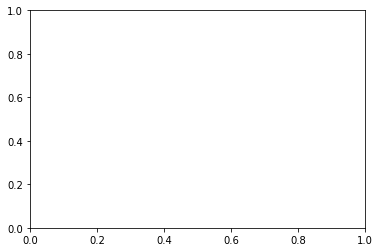

In [32]:
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
x.shape, y.shape

In [ ]:
y_test.shape

In [ ]:
x_test.shape

In [ ]:
x

In [230]:
from sklearn.preprocessing import StandardScaler

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [116]:
rfc = RandomForestRegressor(n_estimators=200, random_state=24)
rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=24, verbose=0, warm_start=False)

In [117]:
y_pred = rfc.predict(x_test)

In [123]:
p_y_pred = y_pred.reshape(y_pred.shape[0], 1)

In [118]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.41088235294118
Mean Squared Error: 4212.499327941177
Root Mean Squared Error: 64.90376975138791


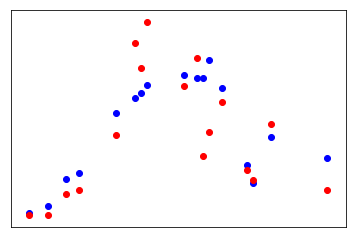

In [147]:
# plt.scatter(x_test, y_test,  color='black')
# plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.scatter(x_test[:,1], y_pred, color='blue')
plt.scatter(x_test[:,1], y_test, color='red')
plt.xticks(())
plt.yticks(())

plt.show()

In [166]:
c_df = pd.read_csv('covid/running_cases.csv', header=None)
c_df.columns = ['full_date', 'cases']
c_df['date'] = c_df['full_date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday)
c_df['dow'] = c_df['full_date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').weekday())
c_df.head()

,full_date,cases,date,dow
0,2020-03-10,2,70,1
1,2020-03-12,10,72,3
2,2020-03-13,4,73,4
3,2020-03-14,17,74,5
4,2020-03-16,21,76,0


In [236]:
c_df.describe()

,cases,date,dow
count,52.000000,52.000000,52.000000
mean,830.903846,97.403846,2.961538
std,521.870852,15.315326,1.960007
min,2.000000,70.000000,0.000000
25%,455.250000,84.750000,1.000000
50%,909.000000,97.500000,3.000000
75%,1204.750000,110.250000,5.000000
max,1952.000000,123.000000,6.000000


In [242]:
t_x = c_df[['date', 'dow']].to_numpy()
t_y = c_df['cases'].to_numpy()
t_x_train, t_x_test, t_y_train, t_y_test = train_test_split(t_x, t_y, test_size=0.33, random_state=24)

In [231]:
sc = StandardScaler()
t_x_train = sc.fit_transform(t_x_train)
t_x_test = sc.transform(t_x_test)

In [280]:
rfc2 = RandomForestRegressor(n_estimators=50, random_state=24)
rfc2.fit(t_x_train, t_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=24, verbose=0, warm_start=False)

In [281]:
t_y_pred = rfc2.predict(t_x_test)
# f_y_pred = rfc2.predict(t_x)

In [282]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.41088235294118
Mean Squared Error: 4212.499327941177
Root Mean Squared Error: 64.90376975138791


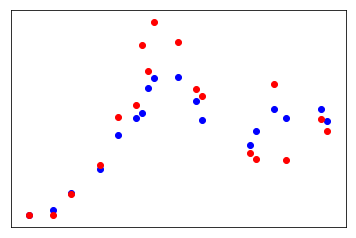

In [283]:
# plt.scatter(x_test, y_test,  color='black')
# plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.scatter(t_x_test[:,0], t_y_pred, color='blue')
plt.scatter(t_x_test[:,0], t_y_test, color='red')
plt.xticks(())
plt.yticks(())

plt.show()

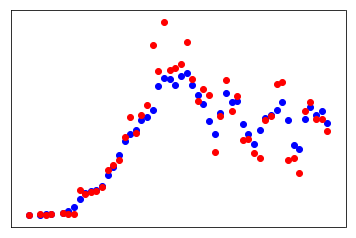

In [284]:
# plt.scatter(x_test, y_test,  color='black')
# plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.scatter(t_x[:,0], f_y_pred, color='blue')
plt.scatter(t_x[:,0], t_y, color='red')
plt.xticks(())
plt.yticks(())

plt.show()

In [285]:
rfc2.predict(np.array([[124, 6]]))

array([797.36])

In [286]:
rfc2.predict(np.array([[125, 0]]))

array([798.72])

In [287]:
rfc2.predict([t_x[-1]])

array([952.9])

In [288]:
t_x[-1]

array([123,   5])

In [294]:
rfc2.predict(np.array([[500, 5]]))

array([952.9])